In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/colab datas/covid19_tn (1).csv')
df.head()


,Date,State,Confirmed,Daily,Recovered,Deceased,Other,Tested
0,01-01-21,Tamil Nadu,818935,921,798420,12135,0,14258645
1,02-01-21,Tamil Nadu,819845,910,799427,12146,0,14321046
2,03-01-21,Tamil Nadu,820712,867,800429,12156,0,14382123
3,04-01-21,Tamil Nadu,821550,838,801414,12166,0,14442625
4,05-01-21,Tamil Nadu,822370,820,802385,12177,0,14502929


In [ ]:

#df.set_index('Date',inplace=True)


In [ ]:
df.tail()

,Date,State,Confirmed,Daily,Recovered,Deceased,Other,Tested
141,22-05-21,Tamil Nadu,1806861,35873,1502537,20046,0,26124748
142,23-05-21,Tamil Nadu,1842344,35483,1527733,20468,0,26301572
143,24-05-21,Tamil Nadu,1877211,34867,1554759,20872,0,26469766
144,25-05-21,Tamil Nadu,1911496,34285,1583504,21340,0,26641632
145,26-05-21,Tamil Nadu,1945260,33764,1613221,21815,0,26814056


In [ ]:
df1=df.loc[:,['Date','Daily']]
df1.head(30)

,Date,Daily
0,01-01-21,921
1,02-01-21,910
2,03-01-21,867
3,04-01-21,838
4,05-01-21,820
5,06-01-21,811
6,07-01-21,805
7,08-01-21,790
8,09-01-21,761
9,10-01-21,724


In [ ]:
df1.tail()

,Date,Daily
141,22-05-21,35873
142,23-05-21,35483
143,24-05-21,34867
144,25-05-21,34285
145,26-05-21,33764


In [ ]:
df1.isnull().sum()

Date     0
Daily    0
dtype: int64

In [ ]:
# Convert Month into Datetime
df1['Date']=pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    146 non-null    datetime64[ns]
 1   Daily   146 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:

#df1.set_index('Date',inplace=True)



In [ ]:
df1.describe()

,Daily
count,146.000000
mean,7720.863014
std,11364.714896
min,438.000000
25%,516.250000
50%,888.500000
75%,10974.750000
max,36184.000000


In [ ]:
index=pd.date_range(start='2021-01-01',end='	2021-05-26',freq='D')
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26'],
              dtype='datetime64[ns]', length=146, freq='D')

In [ ]:
data=pd.Series(df1['Daily'].values,index)
data

2021-01-01      921
2021-01-02      910
2021-01-03      867
2021-01-04      838
2021-01-05      820
              ...  
2021-05-22    35873
2021-05-23    35483
2021-05-24    34867
2021-05-25    34285
2021-05-26    33764
Freq: D, Length: 146, dtype: int64

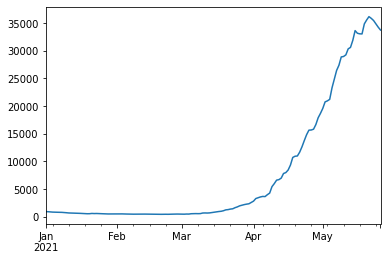

In [ ]:
data.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(data.values)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(daily):
    result=adfuller(daily)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(data.values)

ADF Test Statistic : -6.564181239036366
p-value : 8.23772016907368e-09
#Lags Used : 14
Number of Observations Used : 131
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


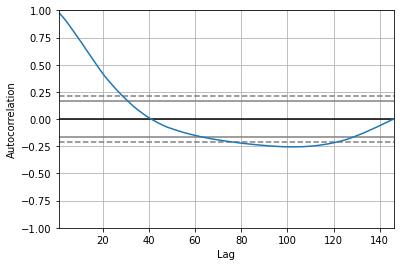

In [ ]:

#Auto Regressive Model
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.values)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import statsmodels.api as sm

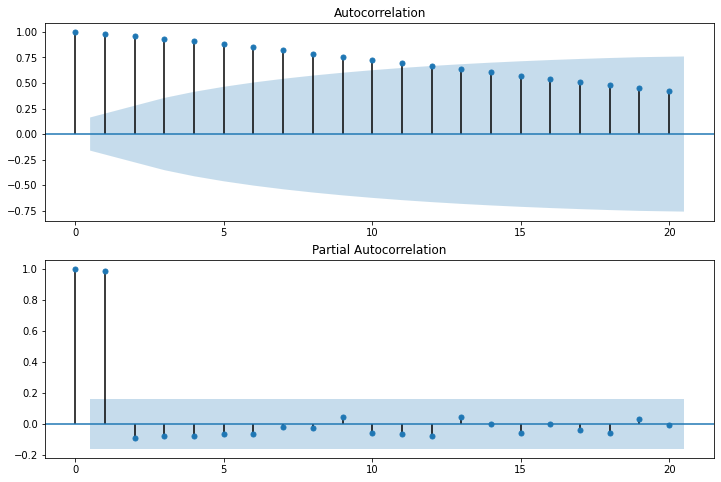

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.values,lags=20,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

model=ARIMA(data,order=(1,1,1))
model_fit=model.fit()

In [ ]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  145
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1066.246
Method:                       css-mle   S.D. of innovations            376.765
Date:                Sun, 30 May 2021   AIC                           2140.492
Time:                        11:26:30   BIC                           2152.399
Sample:                    01-02-2021   HQIC                          2145.331
                         - 05-26-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.7706    177.792      0.842      0.401    -198.695     498.236
ar.L1.D.y      0.9536      0.033     28.790      0.000       0.889       1.019
ma.L1.D.y     -0.7139      0.085     -8.400      0.000      -0.881      -0.547
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0486           +0.0000j            1.0486            0.0000
MA.1            1.4007           +0.0000j            1.4007            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
df2=pd.DataFrame()

df2=data.to_frame()
print(df2)
#df2.rename(columns = {'Date','daily'}, inplace = True)
df2['forecast']=model_fit.predict()
print(df2)
#print(df2)
#df2.columns['Date','Values']=data.to_frame()
#print()


                0
2021-01-01    921
2021-01-02    910
2021-01-03    867
2021-01-04    838
2021-01-05    820
...           ...
2021-05-22  35873
2021-05-23  35483
2021-05-24  34867
2021-05-25  34285
2021-05-26  33764

[146 rows x 1 columns]
                0    forecast
2021-01-01    921         NaN
2021-01-02    910  149.770611
2021-01-03    867   66.704823
2021-01-04    838   31.332537
2021-01-05    820   19.022472
...           ...         ...
2021-05-22  35873  605.718163
2021-05-23  35483  364.846450
2021-05-24  34867  173.945906
2021-05-25  34285  -16.512114
2021-05-26  33764 -144.336621

[146 rows x 2 columns]


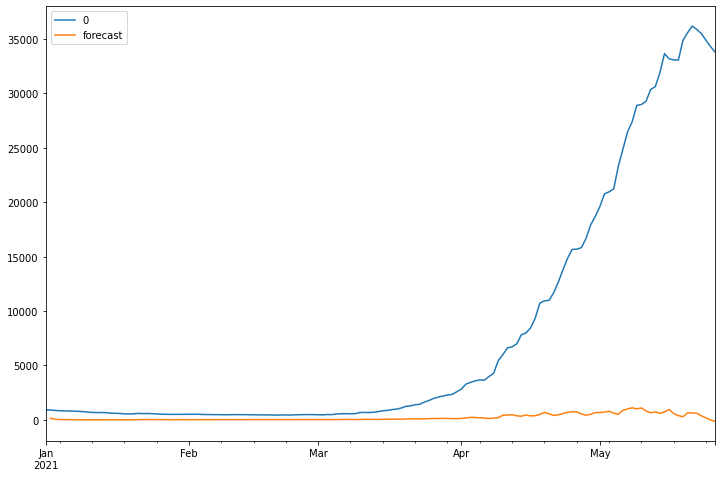

In [ ]:
df2[[0,'forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:

#model=sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1,1,1,1))
#results=model.fit()

In [ ]:
df3=pd.DataFrame()
df3=data.to_frame()
print(df3)
#df2.rename(columns = {'Date','daily'}, inplace = True)
model=sm.tsa.statespace.SARIMAX(df3,order=(2, 1, 1),seasonal_order=(1,1,1,1))
results=model.fit()


                0
2021-01-01    921
2021-01-02    910
2021-01-03    867
2021-01-04    838
2021-01-05    820
...           ...
2021-05-22  35873
2021-05-23  35483
2021-05-24  34867
2021-05-25  34285
2021-05-26  33764

[146 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
df3['forecast']=results.predict()
print(df3['forecast'])
#df3[['Daily','forecast']].plot(figsize=(12,8))

2021-01-01        0.000000
2021-01-02     1398.552900
2021-01-03      936.056927
2021-01-04      862.210610
2021-01-05      851.226157
                  ...     
2021-05-22    36564.912615
2021-05-23    36084.504553
2021-05-24    35739.108762
2021-05-25    35075.776534
2021-05-26    34379.455452
Freq: D, Name: forecast, Length: 146, dtype: float64


In [ ]:
df3

,0,forecast
2021-01-01,921,0.000000
2021-01-02,910,1398.552900
2021-01-03,867,936.056927
2021-01-04,838,862.210610
2021-01-05,820,851.226157
...,...,...
2021-05-22,35873,36564.912615
2021-05-23,35483,36084.504553
2021-05-24,34867,35739.108762
2021-05-25,34285,35075.776534


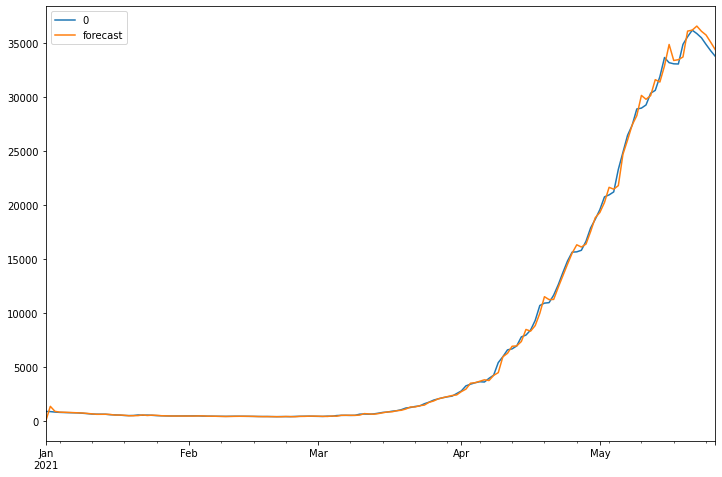

In [ ]:
df3[[0,'forecast']].plot(figsize=(12,8))

In [ ]:
df3

,0,forecast
2021-01-01,921,0.000000
2021-01-02,910,1398.552900
2021-01-03,867,936.056927
2021-01-04,838,862.210610
2021-01-05,820,851.226157
...,...,...
2021-05-22,35873,36564.912615
2021-05-23,35483,36084.504553
2021-05-24,34867,35739.108762
2021-05-25,34285,35075.776534


**SARIMA**

In [ ]:
# next 50 days prediction 
from pandas.tseries.offsets import DateOffset
future_dates=[df3.index[-1]+ DateOffset(days=x)for x in range(0,50)]

In [ ]:
# created dates
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df3.columns)
future_datest_df

,0,forecast
2021-05-27,NaN,NaN
2021-05-28,NaN,NaN
2021-05-29,NaN,NaN
2021-05-30,NaN,NaN
2021-05-31,NaN,NaN
2021-06-01,NaN,NaN
2021-06-02,NaN,NaN
2021-06-03,NaN,NaN
2021-06-04,NaN,NaN
2021-06-05,NaN,NaN


In [ ]:

future_df=pd.concat([df3,future_datest_df])

In [ ]:
future_df

,0,forecast
2021-01-01,921,0.000000
2021-01-02,910,1398.552900
2021-01-03,867,936.056927
2021-01-04,838,862.210610
2021-01-05,820,851.226157
...,...,...
2021-07-10,NaN,NaN
2021-07-11,NaN,NaN
2021-07-12,NaN,NaN
2021-07-13,NaN,NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


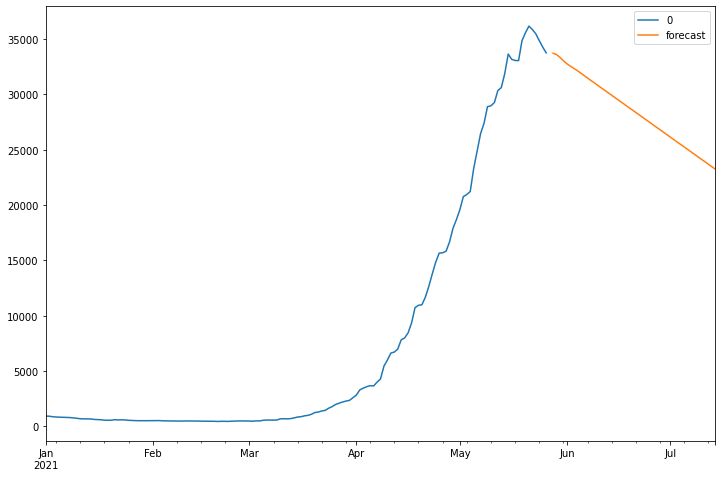

In [ ]:

future_df['forecast'] = results.predict(start = 147, end = 265, dynamic= True)  
future_df[[0, 'forecast']].plot(figsize=(12, 8))


**SARIMA gives better result compare to ARIMA**